In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("airfoil_self_noise.dat", sep="\t", header=None)

In [3]:
df.head()

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [5]:
df.columns=["Frequency","Angle of attack","Chord Length","Free-stream velocity","Suction side","pressure level"]

In [6]:
df.head()

,Frequency,Angle of attack,Chord Length,Free-stream velocity,Suction side,pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [7]:
df.isnull().sum()

Frequency               0
Angle of attack         0
Chord Length            0
Free-stream velocity    0
Suction side            0
pressure level          0
dtype: int64

In [8]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [12]:
y.head()

0    126.201
1    125.201
2    125.951
3    127.591
4    127.461
Name: pressure level, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.55, random_state=50)

# Graphs

Matplotlib is building the font cache; this may take a moment.


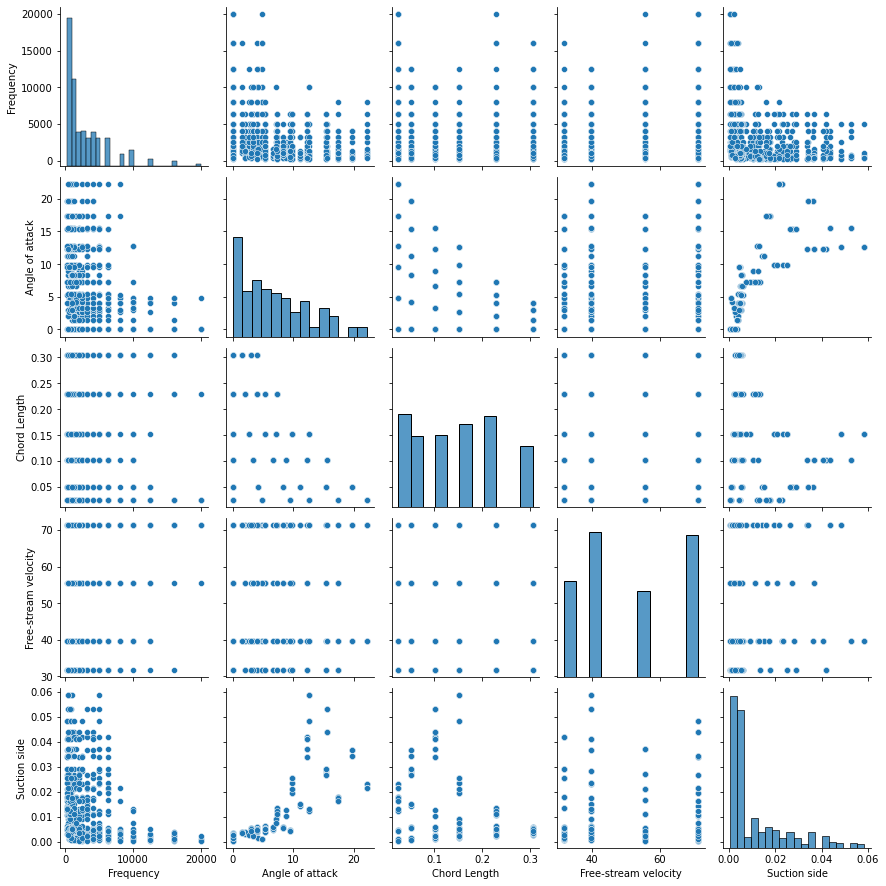

In [15]:
import seaborn as sns
sns.pairplot(X_train)

# Learning Regression

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_regressor = LinearRegression()
mse = cross_val_score(lin_regressor, X_train, y_train, scoring="neg_mean_absolute_error", cv=5)
mean_mse = np.mean(mse)
print(mean_mse)

-3.973136044558804


#Ridge regeression

In [23]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
parameters={'alpha' :[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring="neg_mean_squared_error", cv=5)
ridge_regressor.fit(X_train, y_train)
print(ridge_regressor.best_score_)

-25.297641705571966


In [24]:
#lasso regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
parameters={'alpha' :[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor = GridSearchCV(ridge, parameters, scoring="neg_mean_squared_error", cv=5)
lasso_regressor.fit(X_train, y_train)
print(lasso_regressor.best_score_)

-25.297641705571966


# Random Forest Regressor

In [27]:
#Random Forest Regressiom

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

random_forest_regressor = RandomForestRegressor()
mse = cross_val_score(random_forest_regressor, X_train,y_train, scoring="neg_mean_squared_error",cv=5)
mean_mse = np.mean(mse)
print(mean_mse)

-6.547091314161125


In [30]:
lin_regressor.fit(X_train, y_train)
lasso_regressor.fit(X_train,y_train)
ridge_regressor.fit(X_train, y_train)
random_forest_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [32]:
prediction_linear = lin_regressor.predict(X_test)
prediction_lasso = lasso_regressor.predict(X_test)
prediction_ridge = ridge_regressor.predict(X_test)
prediction_random = random_forest_regressor.predict(X_test)

C:\Users\Pavan kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pressure level', ylabel='Density'>

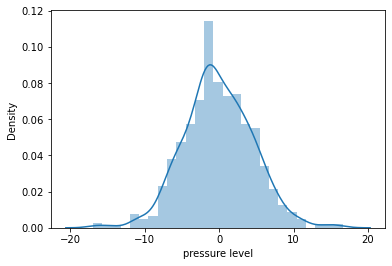

In [33]:
sns.distplot(y_test-prediction_linear)

C:\Users\Pavan kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pressure level', ylabel='Density'>

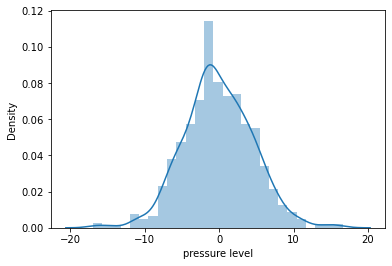

In [35]:
sns.distplot(y_test-prediction_lasso)

C:\Users\Pavan kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pressure level', ylabel='Density'>

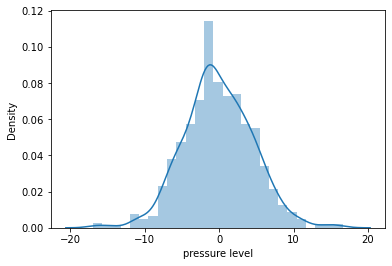

In [36]:
sns.distplot(y_test-prediction_ridge)

C:\Users\Pavan kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pressure level', ylabel='Density'>

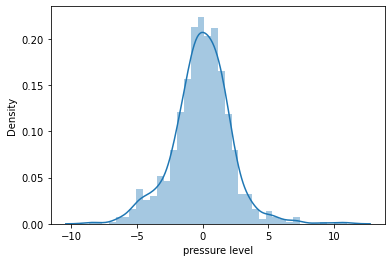

In [37]:
sns.distplot(y_test-prediction_random)

# Testing Models

In [39]:
lin_regressor.score(X_test, y_test)

0.5400625716925165

In [40]:
lasso_regressor.score(X_test, y_test)

-21.65999284387407

In [41]:
ridge_regressor.score(X_test, y_test)

-21.65999284387407

In [42]:
random_forest_regressor.score(X_test, y_test)

0.8953995246343274

# Save Model

In [43]:
import pickle
pickle.dump(random_forest_regressor, open("modek.pkl", "wb"))

In [44]:
pickled_model = pickle.load(open("modek.pkl", "rb"))
pickled_model.score(X_test, y_test)

0.8953995246343274

In [ ]:
#finaly Random Forest Regressor is best accuracy